In [1]:
import skimage.io as io
from skimage import color
from skimage.transform import rotate
from skimage import img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
image = io.imread('example.png')
#print(image.shape)
image = color.gray2rgb(image)

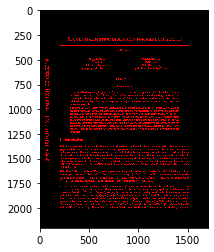

In [3]:
im_red = np.copy(image)
mask_r = im_red[:,:, 0] != 255
im_red[mask_r] = [255,0,0]
mask_r = im_red[:,:, 1] == 255
im_red[mask_r] = [0,0,0]
plt.imshow(im_red)

/usr/local/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


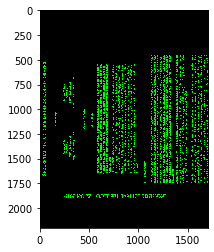

In [4]:
im_green = np.copy(image)
mask_g = im_green[:,:, 1] != 255
im_green[mask_g] = [0,255,0]
mask_g = im_green[:,:,0] == 255
im_green[mask_g] = [0,0,0]
im_green = rotate(im_green, 90, mode = 'edge')
im_green = img_as_ubyte(im_green)
plt.imshow(im_green)

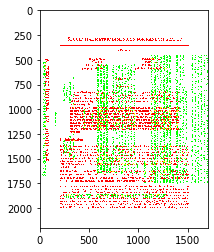

In [5]:
mask = im_red > im_green
im_res = np.ndarray(shape=im_red.shape, dtype=float)
im_res = img_as_ubyte(im_res)
im_res[~mask] = np.copy(im_green[~mask])
im_res[mask] = np.copy(im_red[mask])
mask_r = (im_res[:,:,0] == 0)
mask_g = im_res[:,:,1] == 0
mask = mask_g * mask_r
im_res[mask] = [255,255,255]
plt.imshow(im_res)
io.imsave('res.png', im_res)